In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
%matplotlib inline
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader
import torch.nn as nn
import torch.nn.functional as F

In [2]:
#make training dataset and download it if we dont have it 
dataset=MNIST(root='data/',download=True)

In [3]:
len(dataset)

60000

In [4]:
#make test dataset keeping train as False
test_dataset=MNIST(root='data/',train=False)

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x21E321F8CD0>, 5)

Label:  5


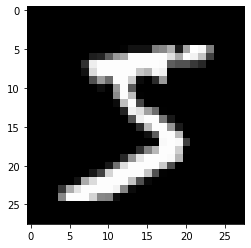

In [6]:
#Plotting the whole image of index 0
image,label=dataset[0]
plt.imshow(image,cmap='gray')
print('Label: ',label)

Label:  2


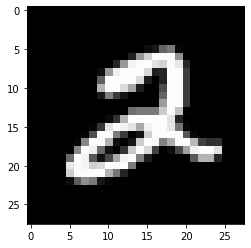

In [7]:
#Plotting the whole image of index 5
image,label=dataset[5]
plt.imshow(image,cmap='gray')
print('Label: ',label)

In [8]:
#changing the PIL image format to tensor format
dataset=MNIST(root='data/',
              train=True,
              transform=transforms.ToTensor())

In [9]:
img_tensor, label=dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [10]:
#Value of the image between the height 10-15 and width 10-15
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


tensor(1.) tensor(0.)


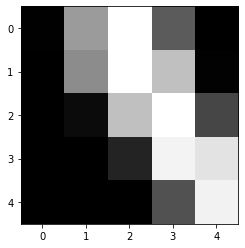

In [11]:
#Plotting the image between the height 10-15 and width 10-15
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')
print(torch.max(img_tensor),torch.min(img_tensor))

In [12]:
#method to split the dataset into trainng and validation sets
def split(n,val):
    #Determine size of validation set
    n_val=int(val*n)
    #Create random permutation of 0 to n-1
    index=np.random.permutation(n)
    #Pick first n_val indices for validation set
    return index[n_val:],index[:n_val]

In [13]:
#Split the data into training and validation set
train_indices,val_indices=split(len(dataset),val=0.2)

In [14]:
batch_size=100
#Training sampler and data loader
train_sampler=SubsetRandomSampler(train_indices)
train_loader=DataLoader(dataset,
                       batch_size,
                       sampler=train_sampler)

#Validation sampler and data loader
val_sampler=SubsetRandomSampler(val_indices)
val_loader=DataLoader(dataset,
                       batch_size,
                       sampler=val_sampler)

In [15]:
#flatenning out the image tensor in a vector size of 784(28*28)
input_size=28*28
#output of each image is a vector of size 10
num_classes=10
#Logistic Regression model
model=nn.Linear(input_size,num_classes)

In [16]:
#checking the bias and the wieghts
print(model.weight.shape)
print(model.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [17]:
# for images,labels in train_loader:
#     print(labels)
#     print(images.shape)
#     ouputs=model(images)
#     break

In [18]:
#Creating own model with nn.Module so that we could reshape the output
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(input_size,num_classes)
    def forward(self,xb):
        xb=xb.reshape(-1,784)
        out=self.linear(xb)
        return out
model=MnistModel()

In [19]:
#Output the Ouput to find the shape and values
for images,label in train_loader:
    outputs=model(images)
    break
print('ouputs.shape: ',outputs.shape)
print('Sample ouputs: \n',outputs[:2].data)

ouputs.shape:  torch.Size([100, 10])
Sample ouputs: 
 tensor([[ 1.1469e-01, -3.4256e-02,  1.3428e-01, -1.6378e-01, -3.3241e-01,
         -6.4652e-05,  7.3024e-02, -1.2871e-02, -8.7259e-02, -1.6835e-02],
        [ 1.6443e-01, -6.5333e-02,  7.1672e-02, -2.5387e-01, -2.3507e-01,
         -8.0857e-02, -4.3228e-02, -2.1537e-01,  1.7341e-01, -1.6588e-01]])


In [20]:
#Apply softmax for each output row
probs=F.softmax(outputs,dim=1)

#Print the Probablitites
print('Sample Probs:\n',probs[:2].data)

#add up the probs of an output row
print('Sum: ',torch.sum(probs[0]).item())

Sample Probs:
 tensor([[0.1149, 0.0990, 0.1172, 0.0870, 0.0735, 0.1024, 0.1102, 0.1011, 0.0939,
         0.1007],
        [0.1244, 0.0988, 0.1133, 0.0818, 0.0834, 0.0973, 0.1010, 0.0851, 0.1255,
         0.0894]])
Sum:  0.9999999403953552


In [21]:
#prediction 
max_probs,preds=torch.max(probs,dim=1)
print(preds)
print(max_probs)

tensor([2, 8, 2, 2, 1, 8, 1, 0, 6, 7, 6, 0, 8, 1, 2, 2, 6, 2, 6, 6, 1, 2, 6, 2,
        0, 8, 1, 0, 6, 8, 1, 1, 8, 8, 6, 2, 8, 2, 6, 6, 6, 8, 2, 2, 2, 0, 6, 1,
        1, 8, 8, 2, 5, 2, 1, 8, 2, 8, 6, 2, 1, 2, 2, 8, 6, 2, 2, 8, 8, 8, 2, 6,
        0, 2, 2, 6, 2, 8, 5, 1, 6, 8, 6, 6, 2, 2, 7, 6, 2, 8, 2, 2, 6, 6, 2, 8,
        8, 2, 2, 6])
tensor([0.1172, 0.1255, 0.1347, 0.1404, 0.1241, 0.1210, 0.1320, 0.1162, 0.1291,
        0.1248, 0.1388, 0.1211, 0.1417, 0.1257, 0.1394, 0.1244, 0.1441, 0.1395,
        0.1484, 0.1305, 0.1530, 0.1240, 0.1216, 0.1252, 0.1144, 0.1354, 0.1270,
        0.1289, 0.1346, 0.1373, 0.1361, 0.1429, 0.1226, 0.1536, 0.1230, 0.1314,
        0.1346, 0.1350, 0.1363, 0.1388, 0.1124, 0.1230, 0.1482, 0.1314, 0.1208,
        0.1196, 0.1266, 0.1254, 0.1243, 0.1275, 0.1309, 0.1295, 0.1222, 0.1267,
        0.1470, 0.1240, 0.1211, 0.1674, 0.1273, 0.1321, 0.1162, 0.1354, 0.1218,
        0.1502, 0.1322, 0.1248, 0.1313, 0.1299, 0.1268, 0.1373, 0.1294, 0.1302,
        0.1247, 0.1

In [22]:
#actual
label

tensor([1, 1, 5, 8, 9, 4, 4, 1, 3, 3, 7, 1, 5, 5, 3, 1, 0, 6, 0, 1, 2, 1, 6, 5,
        5, 4, 4, 8, 8, 6, 0, 2, 0, 8, 1, 3, 3, 9, 7, 7, 1, 9, 4, 1, 4, 7, 1, 0,
        5, 6, 5, 1, 5, 2, 4, 5, 1, 6, 5, 7, 0, 4, 4, 4, 2, 7, 4, 4, 7, 5, 4, 8,
        8, 5, 4, 0, 8, 6, 8, 7, 7, 7, 0, 7, 8, 6, 7, 0, 3, 9, 5, 1, 8, 5, 1, 7,
        5, 3, 6, 2])

In [23]:
#Find the Accuracy
def accuracy(l1,l2):
    return torch.sum(l1==l2).item()/len(l1)

In [24]:
accuracy(preds,label)

0.05

In [25]:
#torch.max is not differentiable so mse can't be used
#so we do cross entropy
loss_fn=F.cross_entropy
loss=loss_fn(outputs,label)
print(loss)

tensor(2.3351, grad_fn=<NllLossBackward0>)


In [26]:
#optimizer
learning_rate=0.001
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [27]:
def loss_batch(model,loss_func,xb,yb,opt=None,metric=None):
    #Calculate loss
    preds=model(xb)
    loss=loss_fn(preds,yb)
    
    #to optimize
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
        
    #to find the acc
    metric_result=None
    if metric is not None:
        #compute the metric
        metric_result=metric(preds,yb)
    return loss.item(),len(xb),metric_result

In [28]:
#use the Validation set to check the loss the model
def evaluate(model,loss_fn,valid_dl,metric=None):
    with torch.no_grad():
        #pass each batch through the model
        results=[loss_batch(model,loss_fn,xb,yb,metric=metric)for xb,yb in valid_dl]
        
        #seperate losses, counts and metrics
        losses,nums,metrics=zip(*results)
        
        #Total size of the dataset
        total=np.sum(nums)
        
        #average loss accross batches
        avg_loss=np.sum(np.multiply(losses,nums))/total
        avg_metric=None
        if metric is not None:
            #average of metric accross batches
            avg_metric=np.sum(np.multiply(metrics,nums))/total
    return avg_loss,total,avg_metric

In [29]:
def accuracy(outputs,labels):
    _,preds=torch.max(outputs,dim=1)
    return torch.sum(preds==labels).item()/len(preds)

In [30]:
#Output the Validation set accuracy and loss
val_loss,total,val_acc=evaluate(model,loss_fn,val_loader,metric=accuracy)
print('Loss: {:.4f},Accuracy: {:.4f}'.format(val_loss,val_acc))

Loss: 2.3436,Accuracy: 0.0669


In [31]:
#Training the model with epochs
def fit(epochs,model,loss_fn,opt,train_dl,valid_dl,metric=None):
    for epoch in range(epochs):
        #Training
        for xb,yb in train_dl:
            loss,_,_=loss_batch(model,loss_fn,xb,yb,opt)
        
        #Evaluation 
        result=evaluate(model,loss_fn,valid_dl,metric)
        val_loss,total,val_metric=result
        
        #print
        if metric is None:
            print('Epoch[{}/{}], Loss: {:.4f}'.format(epoch+1,epochs,val_loss))
        else:
            print('Epoch[{}/{}], Loss: {:.4f}, {}: {:.4f}'.format(epoch+1,epochs,val_loss,metric.__name__,val_metric))

In [32]:
#Redefine model and Optimizer
model=MnistModel()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [33]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch[1/5], Loss: 1.8938, accuracy: 0.6674
Epoch[2/5], Loss: 1.5890, accuracy: 0.7632
Epoch[3/5], Loss: 1.3750, accuracy: 0.7903
Epoch[4/5], Loss: 1.2218, accuracy: 0.8055
Epoch[5/5], Loss: 1.1084, accuracy: 0.8164


In [35]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch[1/5], Loss: 0.7831, accuracy: 0.8432
Epoch[2/5], Loss: 0.7552, accuracy: 0.8469
Epoch[3/5], Loss: 0.7308, accuracy: 0.8498
Epoch[4/5], Loss: 0.7093, accuracy: 0.8518
Epoch[5/5], Loss: 0.6902, accuracy: 0.8532


In [36]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch[1/5], Loss: 0.6730, accuracy: 0.8549
Epoch[2/5], Loss: 0.6576, accuracy: 0.8568
Epoch[3/5], Loss: 0.6436, accuracy: 0.8581
Epoch[4/5], Loss: 0.6308, accuracy: 0.8601
Epoch[5/5], Loss: 0.6191, accuracy: 0.8613
